# Greetings!
> You received this jupyter notebook as we believe this can be a great fit. <br>
> The goal of this notebook is to understand our challenges better <br> and assess your proficiency in python & pandas.

### Several remarks:
* You are welcome to use the internet, consult, and use any available sources.
* There is no time limit, and we do not monitor any versioning or pace. Take your time and have fun.
* The notebook should take up to two hours. If it takes more than that, please reach out.
We tried to create an intriguing assignment. If you have any feedback - we'll be happy to hear.
* A text cell decorated with "👷" will be followed by a code cell you are welcome to fill in.

### **Make sure the notebook runs end to end before submission**

# **The products recommendation notebook**
The data at hand represents 12,000 bank clients and their monthly financial status.
<br> The data is featured as a tabular schema, where each row contains 48 features.
>The first 24 features are client-level entities such as age, residence country, and the joining channel.
<br>The last 24 features are the **products** the client owns in a specified month (`Status_Dt`).

Our task is to *forecast* which products a client will add or remove next month, given that we have all past information on the client.

# Logistics

In [ ]:
# You will probably need to run this cell twice,
# as google colab has runtime issues after installing some libraries
# (press the "Restart runtime" button in the output cell)
!pip install --upgrade gdown

In [ ]:
# Download and extract the dataset
!rm -rf sample_data
!mkdir data & gdown 1DkOvf0LaRgCVfLEtHXr5ztaHhGN4-tDu -O data/features_products.zip
!unzip data/features_products.zip -d data/features_products
!find . -name "*.zip" ! -iname features_products.zip | while read filename; do unzip -o -d "`dirname "$filename"`" "$filename"; done;
!find . -name "*.zip" -delete

Downloading...
From (original): https://drive.google.com/uc?id=1DkOvf0LaRgCVfLEtHXr5ztaHhGN4-tDu
From (redirected): https://drive.google.com/uc?id=1DkOvf0LaRgCVfLEtHXr5ztaHhGN4-tDu&confirm=t&uuid=ed22b2a6-8146-4aa3-80c4-ed53954d416d
To: /content/data/features_products.zip
100% 240M/240M [00:05<00:00, 44.8MB/s]
Archive:  data/features_products.zip
  inflating: data/features_products/sample_submission.csv.zip  
  inflating: data/features_products/test_ver2.csv.zip  
  inflating: data/features_products/train_ver2.csv.zip  
Archive:  ./data/features_products/train_ver2.csv.zip
  inflating: ./data/features_products/train_ver2.csv  
Archive:  ./data/features_products/test_ver2.csv.zip
  inflating: ./data/features_products/test_ver2.csv  
Archive:  ./data/features_products/sample_submission.csv.zip
  inflating: ./data/features_products/sample_submission.csv  


In [ ]:
# Import libraries and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Sample the dataset (We only want to experiment with the data).
limit_rows   = 7000000
df           = pd.read_csv("data/features_products/train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str},
                                                     nrows=limit_rows)


In [ ]:
# The original schema was in Spanish. We will rename the columns for readability.
df.columns = ['Status_Dt', 'Cust_ID', 'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Age', 'Join_Dt',
                'Is_New_Cust', 'Cust_Since', 'Relship_Status','Lst_Dt_Primary_Cust', 'Cust_Type_Mth_Beg',
                'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner', 'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg',
                'Address_Type', 'Cust_Province_Cd', 'Cust_Province_Name', 'Cust_Active_Status', 'Gross_HHLD_Income',
                'Cust_Segment', 'Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
                'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct', 'Short_Term_Deposits',
                'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds', 'Mortgage', 'Pension1', 'Loans',
                'Taxes', 'Credit_Card', 'Securities', 'Home_Acct', 'Payroll', 'Pension2', 'Direct_Debit']

# Sample the dataset (We only want to experiment with the data).
unique_ids   = pd.Series(df["Cust_ID"].unique())
limit_people = int(1.2e4)
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.Cust_ID.isin(unique_id)]

In [ ]:
# Cast relevant data types
date_attribs = ['Status_Dt', 'Join_Dt', 'Lst_Dt_Primary_Cust']
for attrib in date_attribs:
    df[attrib] = pd.to_datetime(df[attrib],format="%Y-%m-%d")
numeric_attribs = ['Age', 'Is_New_Cust', 'Cust_Since', 'Relship_Status', 'Address_Type', 'Cust_Active_Status']
for attrib in numeric_attribs:
    df[attrib] = pd.to_numeric(df[attrib], downcast='integer',errors='coerce')

# Exploratory Data Analysis 👷

### The task in this phase is to analyze the data.
#### Think of at least 3-5 useful EDA plots to present that helps understand the underlying statistics. Explain why you selected these plots. What insights/questions did you also find during the EDA?
*Remember - The goal is to predict which items customers will add in the following month.*

> You are not obligated to submit all plots and analyses you perform.
<br>Try to understand the data as good as possible.


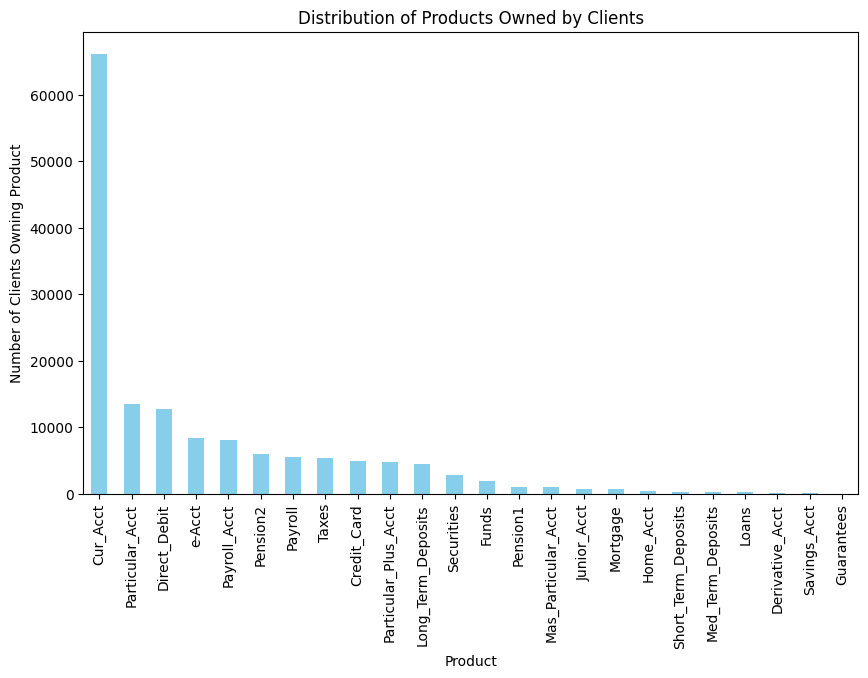

In [ ]:
from copy import deepcopy

df_eda = deepcopy(df)

features_columns = ['Status_Dt', 'Cust_ID', 'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Age', 'Join_Dt',
                'Is_New_Cust', 'Cust_Since', 'Relship_Status','Lst_Dt_Primary_Cust', 'Cust_Type_Mth_Beg',
                'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner', 'Join_Channel', 'Deceased_Flg',
                'Address_Type', 'Cust_Province_Cd', 'Cust_Province_Name', 'Cust_Active_Status', 'Gross_HHLD_Income',
                'Cust_Segment']

product_columns = ['Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct',
                   'Payroll_Acct', 'Junior_Acct', 'Mas_Particular_Acct',
                   'Particular_Acct', 'Particular_Plus_Acct', 'Short_Term_Deposits',
                   'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct',
                   'Funds', 'Mortgage', 'Pension1', 'Loans', 'Taxes',
                   'Credit_Card', 'Securities', 'Home_Acct', 'Payroll',
                   'Pension2', 'Direct_Debit']

product_counts = df_eda[product_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Products Owned by Clients')
plt.ylabel('Number of Clients Owning Product')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.show()

**Why I Selected It**: This bar plot gives us information of which products are the most owned by clients and therefore it can help us to identify popular products. <br>
**Insights**: Current Accounts (Cur_Acct) is the most owned product, other products like Particular_Acct, Payroll_Acct, and Pension2 are also popular and  products like Short_Term_Deposits and Savings_Acct are less common. We can conclude form the plot that most clients prefer basic products like transactional and savings accounts.



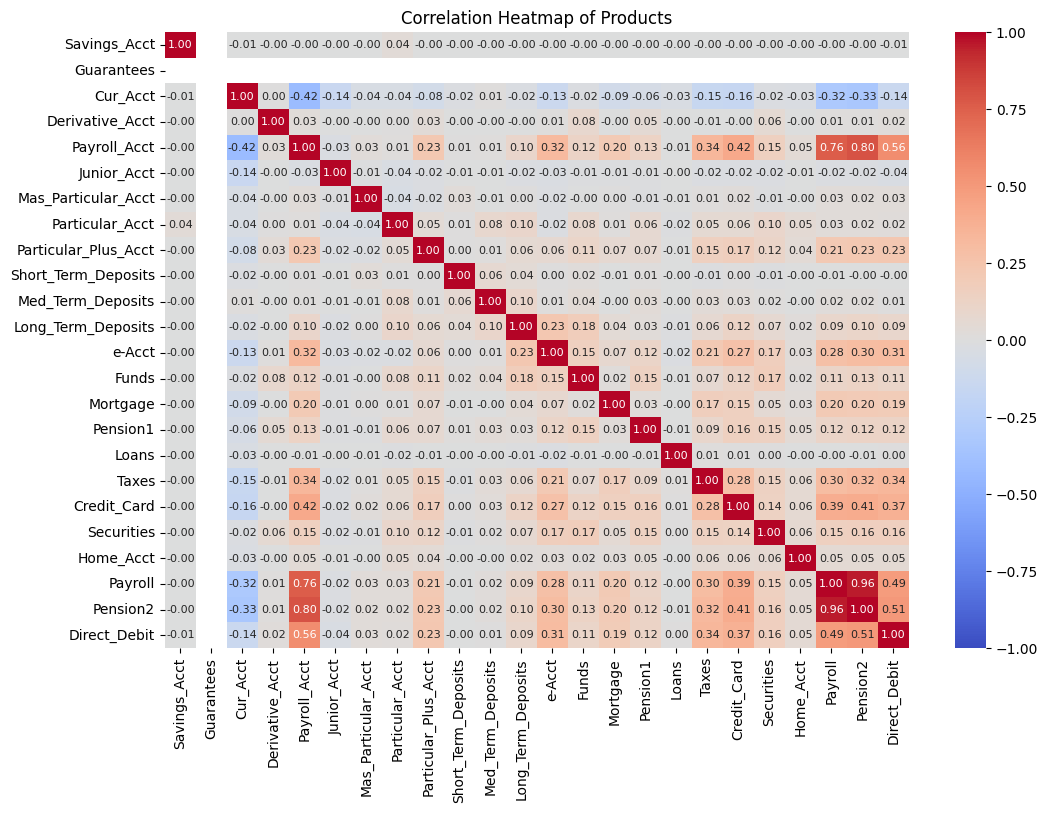

In [ ]:
corr_matrix = df_eda[product_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8}, fmt=".2f")
plt.title('Correlation Heatmap of Products')
plt.show()

**Why I Selected It**: This heatmap helps us to understand the relationships between different products and which products clients tend to own together. <br>
**Insights**: The heatmap shows that Payroll_Acct and Pension2 have high correlations with other products which mean that clients who own these products tend to own multiple others as well. Moreover there are a lot of product with small correlation which mean that are more independently owned. These relationships could help suggest products to clients.

<Figure size 1000x600 with 0 Axes>

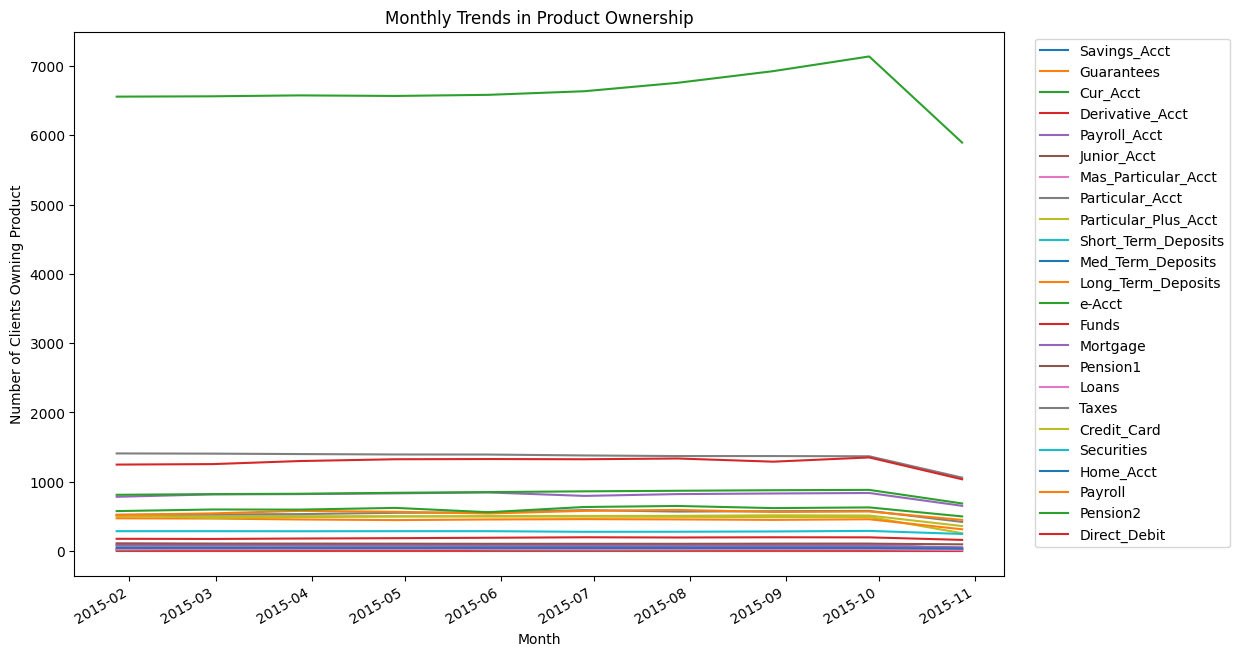

In [ ]:
monthly_trends = df_eda.groupby('Status_Dt')[product_columns].sum()
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', figsize=(12, 8))
plt.title('Monthly Trends in Product Ownership')
plt.ylabel('Number of Clients Owning Product')
plt.xlabel('Month')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

**Why I Selected It**: This line plot help us to see how product ownership changes over time. <br>
**Insights**: The trends show that most products have stable ownership over time, with Cur_Acct maintaining which have a high level of ownership. Moreover we can see that starting from October 2015, product ownership decreased a bit. Following these trends can help figure out which products to focus on for growth or to keep customers interested.

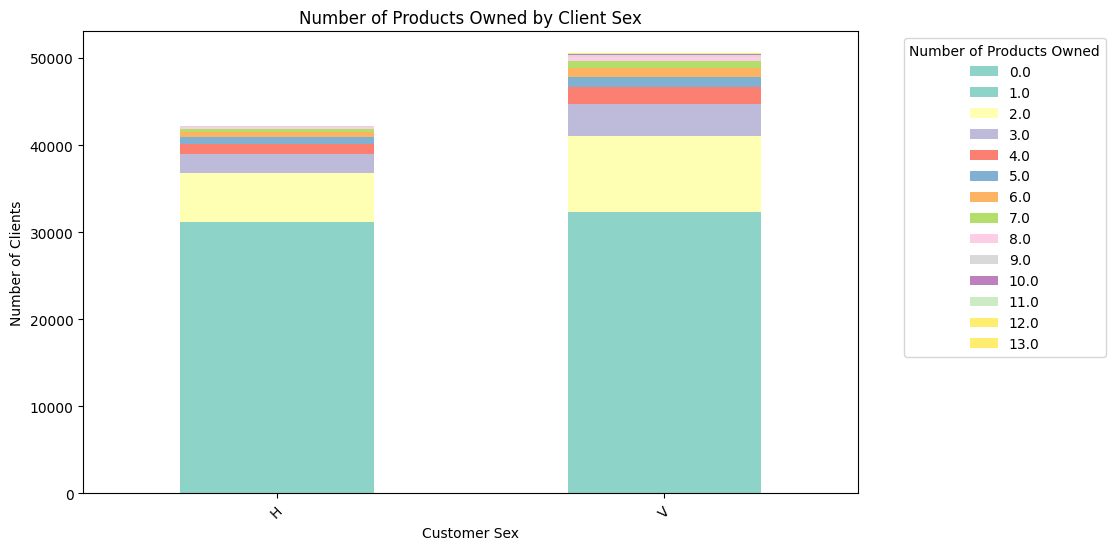

In [ ]:
df_eda['num_products_owned'] = df_eda[product_columns].sum(axis=1)
grouped_data = df_eda.groupby(['Cust_Sex', 'num_products_owned']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Number of Products Owned by Client Sex')
plt.ylabel('Number of Clients')
plt.xlabel('Customer Sex')
plt.legend(title='Number of Products Owned', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

**Why I Selected It**: This Stacked Bar Plot shows how many products are owned by male (H) and female (V) clients. It can help us understand if there are differences in product usage between genders. <br>
**Insights**: The distribution is quite similar between males and females, with both groups mostly owning between 1 and 4 products. However, there is a slight trend showing that female clients tend to own more products on average.

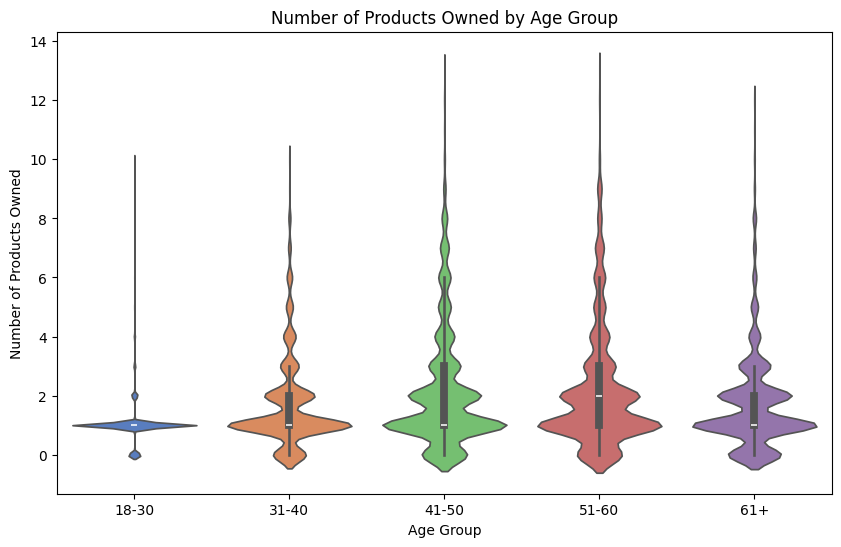

In [ ]:
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']
df_eda['Age_Group'] = pd.cut(df_eda['Age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age_Group', y='num_products_owned', data=df_eda, palette='muted')
plt.title('Number of Products Owned by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Products Owned')
plt.show()

**Why I Selected It**: This violin plot shows the distribution of product ownership from different age groups. It can give us a better understanding of how product engagement changes with age. <br>
**Insights**: Older clients, particularly those aged 41-50, tend to own more products compared to younger clients. Clients in the 18-30 age range generally own fewer products. From this plot, we can identify strategies to better target younger clients.

# Let's get down, let's get down to business! 🕺💃 👷

After understanding our data better, we would like to train a model to predict the following products a client is about to add or remove.

The development will be segmented into *three* steps.

1.   Create a label vector for each month:
<br>The label vector for each `<client, date>` is the *difference* between the products the client holds in `<date>` and the products of the same client in the consecutive month.<br>
For example, if a client `X` holds a credit card, and does not have a loan or a savings account in March 2019 (translates to the vector `[1,0,0]`) and canceled the credit card in April 2019 but opened a savings account (translates to the vector `[0,0,1]`) - The label for `X, March 2019` will be `[-1,0,1].` <br><br>

2.   Use Feature engineering and Feature selection methods to enrich the training dataset.

3. Use any relevant classification algorithm to predict the shift between consecutive months.



## Create labels

In [ ]:
# Create a label feature vector per <Cust_ID,Status_Dt>
# The label vector will be of length 27 and will represent the change in products between consecutive months
# Create a `next_data_label` dataframe with the following columns:
# ['Cust_ID','Status_Dt', 'Status_Dt_shifted', ... 24 difference product difference label columns ...]
# The name of each label column will be the original column name with the added suffix '_change`
# e.g `Funds_change`.

###### Your Code Here ######

df_copy = deepcopy(df)

# Drop target column with a bit of nan
df_copy.dropna(subset=['Payroll', 'Pension2'], inplace=True)

# Sort the data by customer ID and date to ensure correct shifting
df_copy = df_copy.sort_values(by=['Cust_ID', 'Status_Dt'])

# Create a shifted DataFrame where each product column is shifted by 1 month for each customer
df_copy['Status_Dt_shifted'] = df_copy.groupby('Cust_ID')['Status_Dt'].shift(-1)
df_shifted = df_copy.groupby('Cust_ID')[product_columns].shift(-1)

# Calculate the difference between current and shifted product ownership
for col in product_columns:
    df_copy[col + '_change'] = df_shifted[col] - df_copy[col]

# Create a DataFrame for the label
label_columns = [col + '_change' for col in product_columns]
next_data_label = df_copy[['Cust_ID', 'Status_Dt', 'Status_Dt_shifted'] + label_columns]

# Drop rows where 'Status_Dt_shifted' is NaN (i.e., last month of each customer where there's no following month)
next_data_label = next_data_label.dropna(subset=['Status_Dt_shifted'])

next_data_label.head()

,Cust_ID,Status_Dt,Status_Dt_shifted,Savings_Acct_change,Guarantees_change,Cur_Acct_change,Derivative_Acct_change,Payroll_Acct_change,Junior_Acct_change,Mas_Particular_Acct_change,...,Mortgage_change,Pension1_change,Loans_change,Taxes_change,Credit_Card_change,Securities_change,Home_Acct_change,Payroll_change,Pension2_change,Direct_Debit_change
4078994,15891,2015-07-28,2015-08-28,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416981,15934,2015-01-28,2015-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836209,15934,2015-02-28,2015-03-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1673946,15934,2015-03-28,2015-04-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2092169,15934,2015-04-28,2015-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Because we only care about behavioural changes, we filter rows with no product change in the consecutive month.
trainable_objects = next_data_label.iloc[:,3:].any(axis=1).to_numpy().nonzero()[0]
next_data_label_relevant = next_data_label.iloc[trainable_objects]

## Create features

#### Feature engineering 👨‍🔧 📏 📝 📊
Feature engineering is a crucial part of working with tabular data.
*italicized text*
We love new libraries and papers and try to be up-to-date as much as possible here at Insait.

Use any feature engineering method or library you know and love, and create new features to enrich your data.
You can choose to do automatic feature engineering or knowledge-based by manually thinking on logical correlations.

In [ ]:
# Name the new dataset enriched_df
###### Your Code Here ######

enriched_df = deepcopy(df)

# Customer tenure (difference between Status_Dt and Join_Dt)
enriched_df['Status_Dt'] = pd.to_datetime(enriched_df['Status_Dt'])
enriched_df['Join_Dt'] = pd.to_datetime(enriched_df['Join_Dt'])
enriched_df['Customer_Tenure'] = (enriched_df['Status_Dt'] - enriched_df['Join_Dt']).dt.days // 30  # tenure in months

# Age group feature
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']
enriched_df['Age_Group'] = pd.cut(enriched_df['Age'], bins=bins, labels=labels, right=False)

# Is_high_income feature
enriched_df['Is_High_Income'] = enriched_df['Gross_HHLD_Income'] > 40000

# Has_multiple_products
product_columns = ['Savings_Acct', 'Guarantees', 'Cur_Acct', 'Loans']
enriched_df['Has_Multiple_Products'] = enriched_df[product_columns].sum(axis=1) > 2

# Customer stability score (proxy for loyalty)
enriched_df['Customer_Stability_Score'] = (enriched_df['Customer_Tenure'] * (1 + enriched_df['Has_Multiple_Products']))

enriched_df.head()

,Status_Dt,Cust_ID,Emp_Status,Cust_Ctry,Cust_Sex,Age,Join_Dt,Is_New_Cust,Cust_Since,Relship_Status,...,Securities,Home_Acct,Payroll,Pension2,Direct_Debit,Customer_Tenure,Age_Group,Is_High_Income,Has_Multiple_Products,Customer_Stability_Score
25,2015-01-28,1050592,N,ES,H,22.0,2012-08-10,0.0,35.0,1.0,...,0,0,0.0,0.0,0,30.0,18-30,False,False,30.0
28,2015-01-28,1050597,N,ES,H,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0.0,0.0,0,30.0,18-30,False,False,30.0
32,2015-01-28,1050602,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0.0,0.0,0,30.0,18-30,True,False,30.0
103,2015-01-28,1050494,N,ES,V,38.0,2012-08-10,0.0,35.0,1.0,...,0,0,0.0,0.0,0,30.0,31-40,True,False,30.0
119,2015-01-28,1050561,N,ES,H,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0.0,0.0,0,30.0,18-30,True,False,30.0


#### Feature Selection
The financial datasets we use at Insait have hundreds of columns.

Training on such massive datasets lead to bad performance and extended training time.

Suggest a feature selection method (Using an open-source library is welcomed), and filter the provided dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel

enriched_selected_df = deepcopy(enriched_df)

new_features_columns = ['Direct_Debit', 'Customer_Tenure', 'Age_Group',
                        'Is_High_Income', 'Has_Multiple_Products', 'Customer_Stability_Score']

for col in enriched_selected_df.columns:
    if enriched_selected_df[col].dtype == 'object':
        enriched_selected_df[col] = enriched_selected_df[col].astype('category')

# Drop columns with a lot of NAN
enriched_selected_df.drop(columns=['Is_Spouse_Emp'], inplace=True)

# Drop target column with a bit of nan
enriched_selected_df.dropna(subset=['Payroll', 'Pension2'], inplace=True)

features_columns_without_spouse = [col for col in features_columns if col != 'Is_Spouse_Emp']

numeric_cols = enriched_selected_df[features_columns_without_spouse + new_features_columns].select_dtypes(include=['float64', 'int64']).columns
categorical_cols = enriched_selected_df[features_columns_without_spouse + new_features_columns].select_dtypes(include=['object', 'category']).columns

# Fill numeric columns (float and int) with the mean
mean_imputer = SimpleImputer(strategy='mean')
enriched_selected_df[numeric_cols] = mean_imputer.fit_transform(enriched_selected_df[numeric_cols])

# Fill categorical columns (object and category) with the most frequent value (mode)
mode_imputer = SimpleImputer(strategy='most_frequent')
enriched_selected_df[categorical_cols] = mode_imputer.fit_transform(enriched_selected_df[categorical_cols])

# Columns that should never be dropped
important_columns = ['Join_Dt', 'Lst_Dt_Primary_Cust', 'Cust_ID', 'Status_Dt']

X = enriched_selected_df.drop(columns=product_columns + important_columns)
y = enriched_selected_df[product_columns]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Use RandomForestClassifier for feature selection (based on importance)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # Use all available CPU cores
# rf.fit(X_encoded, y_sample)
rf.fit(X_encoded, y)

# Use SelectFromModel to select important features based on their importance
sfm = SelectFromModel(rf, threshold='mean')
sfm.fit(X_encoded, y)

selected_features = X_encoded.columns[sfm.get_support()]

# Use the selected features from X_encoded and concatenate them with important columns and target columns
enriched_selected_df_final = pd.concat([X_encoded[selected_features], enriched_selected_df[important_columns + product_columns]], axis=1)

enriched_selected_df_final.head()

,Age,Cust_Since,Cust_Province_Cd,Cust_Active_Status,Gross_HHLD_Income,Payroll_Acct,Junior_Acct,Particular_Acct,Particular_Plus_Acct,Long_Term_Deposits,...,Age_Group_51-60,Age_Group_61+,Join_Dt,Lst_Dt_Primary_Cust,Cust_ID,Status_Dt,Savings_Acct,Guarantees,Cur_Acct,Loans
25,22.0,35.0,31.0,0.0,134911.808146,0,0,0,0,0,...,False,False,2012-08-10,NaT,1050592.0,2015-01-28,0,0,1,0
28,23.0,35.0,45.0,0.0,134911.808146,0,0,0,0,0,...,False,False,2012-08-10,NaT,1050597.0,2015-01-28,0,0,1,0
32,23.0,35.0,37.0,1.0,91282.710000,0,0,0,0,0,...,False,False,2012-08-10,NaT,1050602.0,2015-01-28,0,0,1,0
103,38.0,35.0,45.0,0.0,42423.030000,0,0,0,0,0,...,False,False,2012-08-10,NaT,1050494.0,2015-01-28,0,0,1,0
119,23.0,35.0,45.0,0.0,120146.490000,0,0,0,0,0,...,False,False,2012-08-10,NaT,1050561.0,2015-01-28,0,0,1,0


In [ ]:
# 2. Merge the enriched_selected_df with the labels (the products difference vector <next_data_label_relevant>)
# Call the final df `features_labels`

###### Your Code Here ######
# Merge the enriched_selected_df with next_data_label_relevant based on Cust_ID and Status_Dt
features_labels = pd.merge(enriched_selected_df, next_data_label_relevant, on=['Cust_ID', 'Status_Dt'])

for col in features_labels.columns:
    if features_labels[col].dtype == 'object':
        features_labels[col] = features_labels[col].astype('category')

features_labels.head()

,Status_Dt,Cust_ID,Emp_Status,Cust_Ctry,Cust_Sex,Age,Join_Dt,Is_New_Cust,Cust_Since,Relship_Status,...,Mortgage_change,Pension1_change,Loans_change,Taxes_change,Credit_Card_change,Securities_change,Home_Acct_change,Payroll_change,Pension2_change,Direct_Debit_change
0,2015-01-28,1052968.0,N,ES,V,39.0,2012-08-20,0.0,35.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2015-01-28,1043992.0,N,ES,H,26.0,2012-08-06,0.0,35.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2015-01-28,1042742.0,N,ES,H,26.0,2012-08-03,0.0,35.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-28,1042229.0,N,ES,H,23.0,2012-08-03,0.0,35.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2015-01-28,1043305.0,N,ES,V,23.0,2012-08-06,0.0,35.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

In [ ]:
# Beware! a random train,test split will not work here, as we will leak data to future occurances.
# We will take samples where the next month in the last month in the db as our testing data, and the rest as train.

next_date_last = (features_labels.Status_Dt_shifted == features_labels.Status_Dt_shifted.max())
train, test = features_labels[next_date_last], features_labels[~next_date_last]

## Training
### It's the final countdown 🍒👷

In [ ]:
# We provide below a helper to preprocess the training features before entering to the model.
from sklearn.preprocessing import LabelEncoder
def prepare_for_model(df):
  features = df.loc[:,~df.columns.str.endswith('_change')].drop(['Cust_ID','Status_Dt'],axis=1)
  labels = df.loc[:,df.columns.str.endswith('_change')]
  features.loc[:,features.dtypes=='object'] = features.loc[:,features.dtypes=='object'].astype('category')

  features = features.drop(['Join_Dt','Status_Dt_shifted','Lst_Dt_Primary_Cust'],axis=1)
  features['Cust_Type_Mth_Beg'] = pd.to_numeric(features.Cust_Type_Mth_Beg, errors='coerce')

  for column in features.columns[features.dtypes == 'category']:
    features[column] = LabelEncoder().fit_transform(features[column])
  return features, labels

train_features, train_labels = prepare_for_model(train)
test_features, test_labels = prepare_for_model(test)

In [ ]:
# There are several months where a client changed more than one item.
# Thus we are looking at a multioutput classification problem.
# Use any algorithm/ platform/ library you desire and train the above `train_features, train_labels`.
# Test on test_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

###### Your Code Here ######
multi_output_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
multi_output_rf.fit(train_features, train_labels)

yhat = multi_output_rf.predict(test_features)
yhat = np.array(yhat)

In [ ]:
# Evaluation code
for idx,col in enumerate(test_labels.columns):
  cm = confusion_matrix(test_labels[col].values,yhat[:,idx])
  cr = classification_report(test_labels[col].values,yhat[:,idx])
  print(f"Label: {col} \nconf\n {cm}, \nreport\n {cr}\n")


Label: Savings_Acct_change 
conf
 [[5085]], 
report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5085

    accuracy                           1.00      5085
   macro avg       1.00      1.00      1.00      5085
weighted avg       1.00      1.00      1.00      5085


Label: Guarantees_change 
conf
 [[5085]], 
report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5085

    accuracy                           1.00      5085
   macro avg       1.00      1.00      1.00      5085
weighted avg       1.00      1.00      1.00      5085


Label: Cur_Acct_change 
conf
 [[  52  455    0]
 [  26 4107   50]
 [   0  291  104]], 
report
               precision    recall  f1-score   support

        -1.0       0.67      0.10      0.18       507
         0.0       0.85      0.98      0.91      4183
         1.0       0.68      0.26      0.38       395

    accuracy                       

What you can say about the results?

The model has high accuracy and precision for the majority class labeled as 0 which represent no changes over two consecutive months, but is bad at predicting the minority classes, -1 and 1. This is happening because there is a class imbalance: the majority of examples belong to class 0, so the performance metrics are biased. Moreovere we obtained low recall and f1-scores for those classes labeled 1 and -1 which indicate that the model did not learn well for those classes.

# This is it!
We hope you enjoyed this notebook.
Please share your thoughts and impressions, and send us a link to your notebook.
Talk to you soon:)